In [2]:
import numpy as np
import pandas as pd
data = pd.read_csv("FinalProjectTrain.csv")
data.describe()
data.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,7524,59,technician,married,secondary,no,0,no,no,cellular,29,aug,2,-1,0,unknown,no
1,4777,31,technician,single,tertiary,no,454,no,no,cellular,30,apr,1,-1,0,unknown,yes
2,1041,34,admin.,single,tertiary,no,4254,yes,no,cellular,21,nov,1,-1,0,unknown,yes
3,3137,33,technician,married,secondary,no,303,yes,no,cellular,3,feb,1,301,5,success,yes
4,2829,38,blue-collar,single,secondary,no,0,no,no,cellular,27,oct,1,75,3,failure,yes


In [2]:
# Check the imbalance
data['deposit'].value_counts()

no     4111
yes    3702
Name: deposit, dtype: int64

In [83]:
data['poutcome'].unique()
data.shape
data.columns
data['deposit'].value_counts()
data.groupby('deposit').mean()

,Unnamed: 0,age,balance,day,campaign,pdays,previous
deposit,,,,,,,
no,8222.105814,40.764777,1218.911944,16.143761,2.833617,36.154220,0.545609
yes,2640.904106,41.478660,1783.750135,15.301729,2.121556,68.013506,1.149649


In [84]:
# correlation btw independent variables
data.corr(method='pearson').round(2)

,Unnamed: 0,age,balance,day,campaign,pdays,previous
Unnamed: 0,1.00,-0.02,-0.06,0.03,0.09,-0.07,-0.06
age,-0.02,1.00,0.10,-0.01,-0.01,0.00,0.02
balance,-0.06,0.10,1.00,0.02,-0.03,0.02,0.04
day,0.03,-0.01,0.02,1.00,0.13,-0.08,-0.07
campaign,0.09,-0.01,-0.03,0.13,1.00,-0.09,-0.04
pdays,-0.07,0.00,0.02,-0.08,-0.09,1.00,0.50
previous,-0.06,0.02,0.04,-0.07,-0.04,0.50,1.00


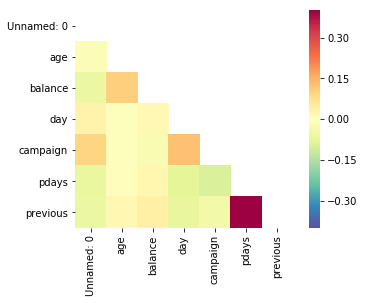

In [85]:
# correlation plot
import seaborn as sns
import matplotlib as plt
corrs = data.corr(method='pearson').round(3)
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.4)

In [3]:
# Separating with continuous and categorical variables. 
cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']
cont = ['age','balance', 'day', 'campaign','pdays', 'previous']
X_cont = data[cont]
X_cat = data[cat]

# Creating dummy variable dataframe from categorical variables.
data_X = X_cont.join(pd.get_dummies(X_cat))

In [4]:
data['deposit'] = data['deposit'].apply(lambda deposit:0 if deposit == "no" else 1)

In [5]:
from sklearn.model_selection import train_test_split
X = data_X
y = data['deposit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state = 0)

In [70]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train[['age','balance', 'day', 'campaign','pdays', 'previous']])
X_test_scale = scaler.transform(X_test[['age','balance', 'day', 'campaign','pdays', 'previous']])

In [71]:
# feature scaling
X_train[['age','balance', 'day', 'campaign','pdays', 'previous']]= X_train_scale
X_test[['age','balance', 'day', 'campaign','pdays', 'previous']] = X_test_scale

C:\Users\hahas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\hahas\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\hahas\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

# LOGISTIC REGRESSION

In [57]:
#import statsmodels.api as sm
#logit_model=sm.Logit(y_train,X_train)
#result=logit_model.fit()
#print(result.summary())

# Create, fit model
mod = sm.Logit(y_train, X_train)
res = mod.fit()

# Output model summary
#print train['city_name'].value_counts()
#print train['signup_channel'].value_counts()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.565882
         Iterations 23
                           Logit Regression Results                           
Dep. Variable:                deposit   No. Observations:                 4687
Model:                          Logit   Df Residuals:                     4645
Method:                           MLE   Df Model:                           41
Date:                Tue, 08 Oct 2019   Pseudo R-squ.:                  0.1825
Time:                        20:08:21   Log-Likelihood:                -2652.3
converged:                       True   LL-Null:                       -3244.6
                                        LLR p-value:                1.342e-221
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                    -0.0057      0.004     -1.383      0.167      -0.014       0.002
b

C:\Users\hahas\Anaconda3\lib\site-packages\statsmodels\base\model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\hahas\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\hahas\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\hahas\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [ ]:
predicted_bi= np.where(predicted >= 0.5, 1, 0)

In [55]:
# Create, output AUC for statsmodel
predicted = res.predict(X_test)
auc = roc_auc_score(y_true=y_test, y_score=predicted)
print('AUC: %s' %auc)
print(accuracy_score(y_test,predicted_bi))
print(classification_report(y_test,predicted_bi))

AUC: 0.7551711717046116
0.7005758157389635
              precision    recall  f1-score   support

           0       0.69      0.80      0.74      1668
           1       0.72      0.58      0.65      1458

    accuracy                           0.70      3126
   macro avg       0.70      0.69      0.69      3126
weighted avg       0.70      0.70      0.70      3126



In [ ]:
# SKlearn Logistic Regression model

In [89]:
# feature selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# Feature extraction
model = LogisticRegression()
rfe = RFE(model, 15)
fit = rfe.fit(X_train, y_train)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Num Features: 15
Selected Features: [False False False False False False False False False False False  True
 False False  True False False False False False False False False False
 False False False False False  True False False False  True False  True
  True  True  True  True False  True  True  True  True  True False False
  True False]
Feature Ranking: [33 36 34 21 35 32 28 26 15 25 12  1 14 29  1 20 19  2 23 13 22  4 31 11
 30 24 27  3 16  1 10  8  9  1 18  1  1  1  1  1 17  1  1  1  1  1  5  7
  1  6]


C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[1338  330]
 [ 595  863]]
              precision    recall  f1-score   support

           0       0.69      0.80      0.74      1668
           1       0.72      0.59      0.65      1458

    accuracy                           0.70      3126
   macro avg       0.71      0.70      0.70      3126
weighted avg       0.71      0.70      0.70      3126

Test accuracy:0.70
Training accuracy: 0.7091956475357372
Coefficient of each feature: [[-5.45206553e-03  6.67136554e-05 -1.98400375e-03 -7.98052094e-02
   3.78518439e-04  5.96855183e-03  0.00000000e+00 -3.69107512e-02
  -5.87504612e-02  0.00000000e+00 -1.74207047e-01  7.87747896e-01
  -1.09572999e-01  0.00000000e+00  4.26513700e-01  9.04837039e-02
   5.45647747e-02 -2.37899566e-01  0.00000000e+00 -1.57987428e-01
   3.30850246e-03 -1.67040011e-01  0.00000000e+00  1.93264647e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  4.01333897e-01
   0.00000000e+00  1.18777714e-02 -4.42220059e-01  1.90112425e-01
   0.00000000e+00 -1.02251717e+0

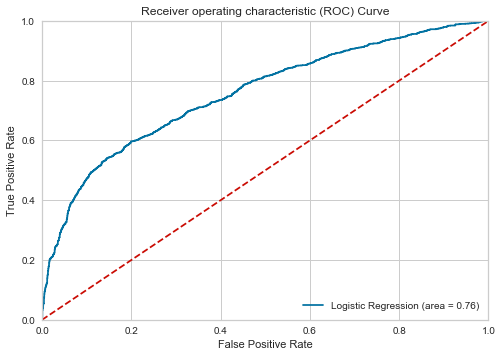

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve, confusion_matrix, classification_report
import matplotlib.pyplot as plt

logmodel = LogisticRegression(C=0.5, max_iter=120, penalty='l1')
logmodel.fit(X_train,y_train)
pred_log = logmodel.predict(X_test)
prob_log = logmodel.predict_proba(X_test)[:,1]

print(confusion_matrix(y_test,pred_log))
print(classification_report(y_test,pred_log))
print('Test accuracy:{:.2f}'.format(logmodel.score(X_test, y_test)))
print('Training accuracy:', logmodel.score(X_train, y_train))
print('Coefficient of each feature:', logmodel.coef_)

roc_value = roc_auc_score(y_test, prob_log)
fpr, tpr, thresholds = roc_curve(y_test,prob_log)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_value)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Validation Curve with C (Accuracy score)

In [119]:
from sklearn.model_selection import validation_curve

param_range = np.logspace(-3, 3, 4)
train_scores, test_scores = validation_curve(LogisticRegression(), X_train, y_train,
                                            param_name='C',
                                            param_range=param_range, cv=5, scoring="accuracy")

C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [120]:
test_scores

array([[0.68443497, 0.65138593, 0.64605544, 0.65955176, 0.65705128],
       [0.70682303, 0.69509595, 0.68656716, 0.70437567, 0.72115385],
       [0.70469083, 0.69189765, 0.68656716, 0.70330843, 0.72008547],
       [0.69936034, 0.69402985, 0.68656716, 0.70330843, 0.72435897]])

C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

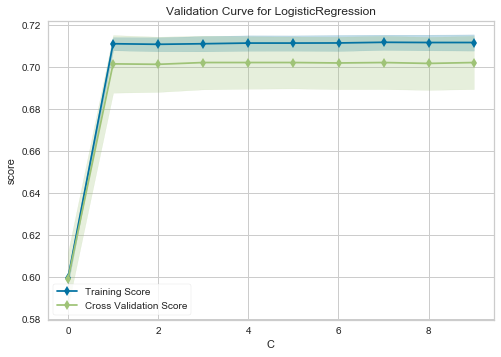

In [121]:
# Plotting
#!pip install yellowbrick
from yellowbrick.model_selection import ValidationCurve
param_range = np.arange(0.001,10) 

viz =ValidationCurve(
    logmodel, param_name= 'C', param_range=param_range, cv=5, scoring="accuracy")

viz.fit(X_train, y_train)
viz.show()

In [ ]:
# Validation Curve with C (AUC score)

C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

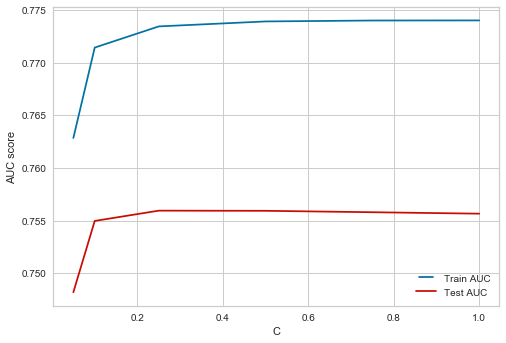

In [122]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report, auc

C = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
train_results = []
test_results = []
for c in C:
   model = LogisticRegression(C=c, max_iter=100, penalty='l1',random_state = 0)
   model.fit(X_train, y_train)
   train_pred = model.predict_proba(X_train)[:,1]
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict_proba(X_test)[:,1]
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(C, train_results, "b", label="Train AUC")
line2, = plt.plot(C, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("C")
plt.show()

## 1) Grid Search

In [109]:
# Grid Search
from sklearn.model_selection import GridSearchCV
import time

C=np.logspace(-1,1,4)
penalty = ['l1','l2']
max_iter = np.arange(100,200,5)
param_grid = dict(penalty = penalty, max_iter = max_iter, C=C)

grid = GridSearchCV(estimator = logmodel, param_grid = param_grid, cv = 5, n_jobs=-1)
grid_result = grid.fit(X,y)
start_time = time.time()

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.704467 using {'C': 0.1, 'max_iter': 120, 'penalty': 'l1'}
Execution time: 0.000997304916381836 ms


C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [123]:
# Cross-Validation
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold

#cv = KFold(n_splits=5, random_state=0)
cv = StratifiedKFold(5)
result = cross_val_score(logmodel, X, y, cv=cv, scoring = 'accuracy')
print(result)
result.mean()

C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.7084399  0.68650032 0.70102433 0.69014085 0.72087068]


C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7013952138136628

# 2)Random Search

In [93]:
from sklearn.model_selection import RandomizedSearchCV

random = RandomizedSearchCV(logmodel, param_grid, random_state=0, cv=5)
random_result = random.fit(X, y)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))

C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Best: 0.704211 using {'penalty': 'l1', 'max_iter': 120, 'C': 0.1}


# Random Forest

In [6]:
# Build the model
import numpy as np 
import pandas as pd 
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score 
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(bootstrap= True, class_weight=None, n_estimators= 1800, random_state=0)

RF.fit(X_train, y_train)
pred_RF = RF.predict(X_test)
prob_RF = RF.predict_proba(X_test)[:, 1]

In [7]:
print(confusion_matrix(y_test,pred_RF))
print(classification_report(y_test,pred_RF))
print(accuracy_score(y_test, pred_RF))

[[1321  347]
 [ 517  941]]
              precision    recall  f1-score   support

           0       0.72      0.79      0.75      1668
           1       0.73      0.65      0.69      1458

    accuracy                           0.72      3126
   macro avg       0.72      0.72      0.72      3126
weighted avg       0.72      0.72      0.72      3126

0.7236084452975048


In [130]:
feature_list=list(data_X.columns)

# visualization

In [ ]:
# Visualizaton
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn import tree
import pydotplus
import pydot

In [ ]:
# Extract the small tree
tree_small = RF.estimators_[1]

# Create DOT data
dot_data = StringIO()
export_graphviz(tree_small, out_file=dot_data, filled=True, rounded=True,
                special_characters=True, feature_names = feature_list, class_names=['No','Yes'])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Show graph
graph.write_png('tree.png')
Image(graph.create_png()) 

# variable Importances

C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.1056327  0.11881588 0.11094973 0.0752676  0.02175952 0.01430582
 0.01458347 0.0172352  0.00866417 0.00549024 0.0152562  0.01130604
 0.00727266 0.01204205 0.00659713 0.0156677  0.00852459 0.00164664
 0.01325157 0.01668532 0.01329912 0.01214173 0.01914801 0.01641835
 0.0082348  0.00325864 0.00327323 0.01600566 0.01303604 0.00938298
 0.01466037 0.01737737 0.00786252 0.03483688 0.01527709 0.01176479
 0.00401307 0.00984183 0.00683552 0.01410264 0.01333904 0.01261964
 0.0176314  0.01033704 0.00965507 0.00987338 0.01253082 0.00787947
 0.02949773 0.02491153]


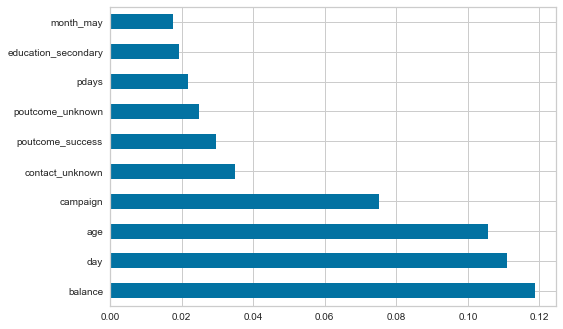

In [139]:
## Feature selection_importances  

import pandas as pd
import numpy as np
 
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.feature_importances_) 
#use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=data_X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [140]:
# New random forest with only the four most important variables
rf_most_important = RandomForestClassifier(n_estimators= 1000, random_state=0)
# Extract the two most important features
important_indices = ['balance','day','age','campaign']
train_important = X_train[important_indices]
test_important = X_test[important_indices]
# Train the random forest
rf_most_important.fit(train_important, y_train)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
# Display the performance metrics
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1070  598]
 [ 645  813]]
              precision    recall  f1-score   support

           0       0.62      0.64      0.63      1668
           1       0.58      0.56      0.57      1458

    accuracy                           0.60      3126
   macro avg       0.60      0.60      0.60      3126
weighted avg       0.60      0.60      0.60      3126

0.6023672424824056


# 1-1)Validation Curve (Accuracy)

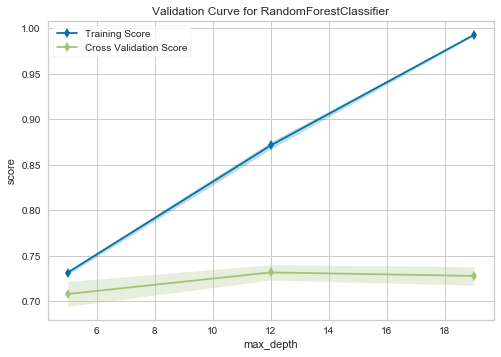

In [151]:
# max_depth
#!pip install yellowbrick
from yellowbrick.model_selection import ValidationCurve
param_range = np.arange(5,20,7) 

viz =ValidationCurve(
    RandomForestClassifier(n_estimators=1000), param_name= 'max_depth',
                                            param_range=param_range, cv=5, scoring="accuracy")

viz.fit(X_train, y_train)
viz.show()

In [147]:
from sklearn.model_selection import validation_curve

param_range = list(range(5,50,10))
train_scores, test_scores = validation_curve(RandomForestClassifier(n_estimators=1000),X_train, y_train,
                                            param_name='max_depth',
                                            param_range=param_range, cv=5,scoring="accuracy")

In [150]:
test_scores

array([[0.70682303, 0.71002132, 0.70788913, 0.69797225, 0.73183761],
       [0.71855011, 0.73880597, 0.73134328, 0.72892209, 0.74038462],
       [0.71641791, 0.73134328, 0.7228145 , 0.72892209, 0.72008547],
       [0.71428571, 0.72814499, 0.72601279, 0.73105656, 0.72435897],
       [0.71428571, 0.72707889, 0.72707889, 0.72785486, 0.7275641 ]])

# 1-2)Validation CURVE (AUC)

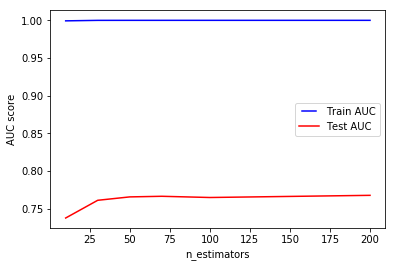

In [10]:
# number of trees
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

n_estimators = [10,30,50,70,100,200]
train_results = []
test_results = []
for i in range(len(n_estimators)):
   model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                                  n_estimators=n_estimators[i], random_state=0)
   model.fit(X_train, y_train)
   train_pred = model.predict_proba(X_train)[:,1]
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict_proba(X_test)[:,1]
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, "b", label="Train AUC")
line2, = plt.plot(n_estimators, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()

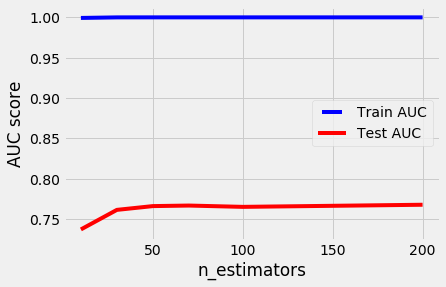

In [97]:
# number of trees
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

n_estimators = [10,30,50,70,100,200]
train_results = []
test_results = []
for n_estimator in n_estimators:
   model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                                  n_estimators=n_estimator, random_state=0)
   model.fit(X_train, y_train)
   train_pred = model.predict_proba(X_train)[:,1]
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict_proba(X_test)[:,1]
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, "b", label="Train AUC")
line2, = plt.plot(n_estimators, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()

C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

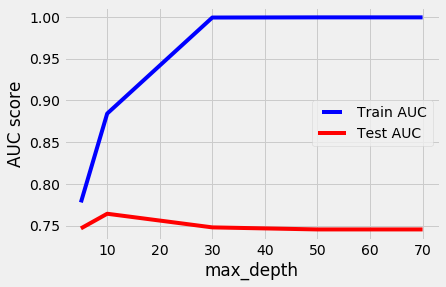

In [99]:
# max_depth
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

max_depth = [5,10,30,50,70]
train_results = []
test_results = []
for max_d in max_depth:
   model = RandomForestClassifier(bootstrap=True,max_depth=max_d, random_state=0)
   model.fit(X_train, y_train)
   train_pred = model.predict_proba(X_train)[:,1]
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict_proba(X_test)[:,1]
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depth, train_results, "b", label="Train AUC")
line2, = plt.plot(max_depth, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("max_depth")
plt.show()


# 2) hyper parameter - grid search

In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth' : list(range(5,30,10)), #10
    'max_features' : list(range(5,30,10)), #10
}

grid = GridSearchCV(RandomForestClassifier(bootstrap = True, n_estimators = 1800), param_grid, cv=5)

In [9]:
best_clf = grid.fit(X_train, y_train)

In [10]:
best_clf.best_params_
best_clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

[[1356  312]
 [ 541  917]]
              precision    recall  f1-score   support

           0       0.71      0.81      0.76      1668
           1       0.75      0.63      0.68      1458

    accuracy                           0.73      3126
   macro avg       0.73      0.72      0.72      3126
weighted avg       0.73      0.73      0.72      3126

0.7271273192578375


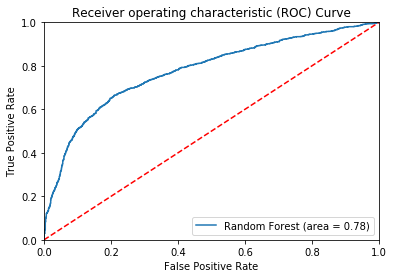

In [12]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
# Build the model
y_pred_RF = best_clf.predict(X_test)
y_prob_RF = best_clf.predict_proba(X_test)[:, 1]
print(confusion_matrix(y_test,y_pred_RF))
print(classification_report(y_test,y_pred_RF))
print(accuracy_score(y_test, y_pred_RF))

roc_value = roc_auc_score(y_test,y_prob_RF)
fpr, tpr, threshold = roc_curve(y_test,y_prob_RF)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % roc_value)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 3) hyper parameter - random

In [111]:
from sklearn.model_selection import RandomizedSearchCV
ramdom = RandomizedSearchCV(RF, param_grid, random_state=0, cv=5)
random_result = random.fit(X,y)
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))

C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Best: 0.703955 using {'penalty': 'l1', 'max_iter': 120, 'C': 0.1}


C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hahas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
"""
1. Class Imbalance / Correlation btw variables / + misleading
2. Feature selection (chi2, recursive feature elimination, LDA, PCA etc)
3. Feature scaling
4. Hyperparameter Tuning (validation curve, grid search, etc)
5. More Features
6. Error Analysis
"""